In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import re
import nltk
import pandas as pd
import nltk as nlp
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords
stopWords = set(stopwords.words('turkish'))
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [4]:
df_train = pd.read_csv('/content/drive/MyDrive/beyazperde/test.csv', encoding= 'unicode_escape')
df_train.head()

,Unnamed: 0,comment,Label
0,0,arkadaslar film bence cok güzel su anda gidile...,1
1,1,mükemmel bir film ve sonu enfes. mutlaka izley...,1
2,2,epey bi uzak durun diyorum..bu ne ya iyice cil...,0
3,3,"sürükleyici bir aksiyon, özellikle sonu çok sa...",1
4,4,hayatimda izledigim en berbat filmdi gerçekten...,0


In [5]:
df_test = pd.read_csv('/content/drive/MyDrive/beyazperde/train.csv', encoding= 'unicode_escape')
df_test.head()

,Unnamed: 0,comment,Label
0,0,biri bana bu filmde benim anlamadigim bisey ol...,0
1,1,ya çocuklar ilk filmin sonunda büyüdüler ya bu...,1
2,2,film biraz daha uzun sürse harbi kiyameti göre...,0
3,3,pek orjinal bi cinayet yok ama orjinal oyuncul...,0
4,4,film tek kelimeyle muhtesemdi heleki sonundaki...,1


In [6]:
def pre_processing(text):
    text = text.lower()  #Büyük harften -Küçük harfe çevirme
    text = re.sub("[^abcçdefgğhıijklmnoöprsştuüvyz]"," ",text)
    text=nltk.word_tokenize(text) # splits the words that are in the sentence from each other.
    text =[word for word in text if not word in set(stopwords.words("turkish"))]
    lemma=nlp.WordNetLemmatizer()
    text=[lemma.lemmatize(word) for word in text] # this code finds the root of the word for a word in the sentence and change them to their root form.
    text=" ".join(text)
    return text

In [7]:
df_train["clean_text"]=df_train["comment"].apply(lambda x: pre_processing(x))
df_test["clean_text"]=df_test["comment"].apply(lambda x: pre_processing(x))

In [8]:
df_train.head()

,Unnamed: 0,comment,Label,clean_text
0,0,arkadaslar film bence cok güzel su anda gidile...,1,arkadaslar film bence cok güzel su anda gidile...
1,1,mükemmel bir film ve sonu enfes. mutlaka izley...,1,mükemmel bir film sonu enfes mutlaka izleyin p...
2,2,epey bi uzak durun diyorum..bu ne ya iyice cil...,0,epey bi uzak durun diyorum iyice cilkini çikar...
3,3,"sürükleyici bir aksiyon, özellikle sonu çok sa...",1,sürükleyici bir aksiyon özellikle sonu sasirti...
4,4,hayatimda izledigim en berbat filmdi gerçekten...,0,hayatimda izledigim berbat filmdi gerçekten ta...


In [9]:
X_train=df_train["clean_text"]
X_test=df_test["clean_text"]
y_train=df_train["Label"]
y_test=df_test["Label"]

print("x_train",X_train.shape)
print("x_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (2666,)
x_test (7996,)
y_train (2666,)
y_test (7996,)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
LogisticRegression = Pipeline([('tfidf', TfidfVectorizer()),('clf', LogisticRegression())])

LogisticRegression .fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])

In [11]:
def plot_confusion_matrix(Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds)
    #print(conf_mat)
    fig = plt.figure(figsize=(6,6))
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
    plt.yticks(range(2), range(2))
    plt.xticks(range(2), range(2))
    plt.colorbar();
    for i in range(2):
        for j in range(2):
            plt.text(i-0.2,j+0.1, str(conf_mat[j, i]), color='tab:red')

CV average score: 0.86
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      3998
           1       0.88      0.87      0.87      3998

    accuracy                           0.87      7996
   macro avg       0.87      0.87      0.87      7996
weighted avg       0.87      0.87      0.87      7996

Train Accuracy : 0.965
Test Accuracy : 0.874
0.87382895558013 : is the precision score
0.8738119059529765 : is the recall score
0.8738104671368723 : is the f1 score


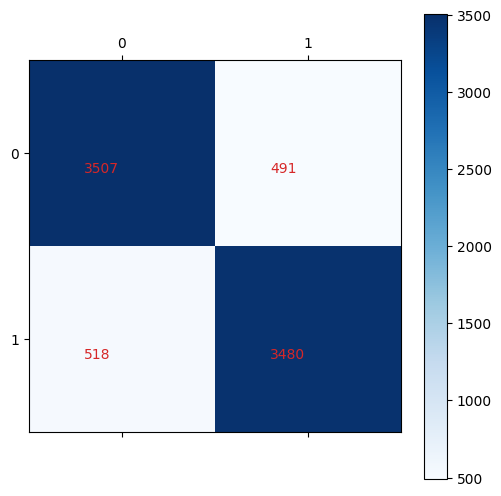

In [12]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

cv_scores = cross_val_score(LogisticRegression, X_train, y_train, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

result = LogisticRegression.predict(X_test)
cr = classification_report(y_test, result)
print(cr)


print('Train Accuracy : %.3f'%LogisticRegression.score(X_train, y_train))
print('Test Accuracy : %.3f'%LogisticRegression.score(X_test, y_test))



y_pred = LogisticRegression.predict(X_test)
print(precision_score(y_test, y_pred ,average='macro') , ": is the precision score")
print(recall_score(y_test, y_pred,average='macro'), ": is the recall score")
print(f1_score(y_test, y_pred ,average='macro'), ": is the f1 score")

plot_confusion_matrix(y_test, LogisticRegression.predict(X_test))

In [13]:
!pip install requests
!pip install html5lib
!pip install bs4

In [25]:
import requests
from bs4 import BeautifulSoup
import csv

#URL="https://www.hdfilmcehennemi1.net/blink-twice-1/"
URL="https://www.hdfilmcehennemi1.net/blink-twice-1/"

# Add headers to mimic a browser request
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
r = requests.get(URL, headers=headers)

# Check if the request was successful
if r.status_code == 200:
    soup = BeautifulSoup(r.content, 'html.parser')

    # Find all divs with the specific class
    review_divs = soup.find_all("p", {"class": "comment-item-content"})

    # Extract the text from each div
    comment_list = [div.text for div in review_divs]

    # Print the first comment (if available)
    if comment_list:
        print(comment_list[0])
    else:
        print("No comments found with the specified class.")
else:
    print(f"Request failed with status code: {r.status_code}")

harbidende leş demek doğru olmaz. puan bile vermem.


In [26]:
positive_count = 0
negative_count = 0
for i in range(len(comment_list)):
  prediction=LogisticRegression.predict([comment_list[i]])
  proportion=LogisticRegression.predict_proba([comment_list[i]])

  if prediction[0]==1:
    print(comment_list[i]," is: ",proportion[0][1]," Positive")
    positive_count += 1
  elif prediction[0]==0:
    print(comment_list[i]," is: ",proportion[0][0]," Negative")
    negative_count += 1
  else:
    print(comment_list[i]," is: ",proportion[0][0]," Neutral")

harbidende leş demek doğru olmaz. puan bile vermem.  is:  0.7803561121553703  Negative
vasat ⭐️⭐️  is:  0.9377835114764912  Negative
Leş demek doğru olmaz bu filme, Leş'e hakaret olur zira LEŞ dediğimiz şeyin bile bir faydası var doğaya...  is:  0.7601507933489976  Negative
cok ıyıdı gerilim ve eglence temalı film ızledım  is:  0.7700105135003424  Positive
kötü diyil,uygun bir zamanda izlemek olar.sıkılmadan izledim  is:  0.6992883788043243  Negative
Ben beğendim.Güzeldi...  is:  0.6568682737015178  Positive
King-Tech'in Ceo'suna Frida King!  is:  0.6113090221103181  Positive
Zor bitirdim. Filmin yarısı gereksiz uzatılmış.  is:  0.7734237776522404  Negative
4 puanlık filmlerden  is:  0.7191128879709191  Positive
türkçe dublaj gelir mi?  is:  0.5827580826976448  Negative


In [27]:
print("Olumlu yorum sayısı:",positive_count)
print("Olumsuz yorum sayısı:",negative_count)
print("Toplam yorum sayısı:",len(comment_list))
if positive_count > negative_count:
  print("Yorum:Bu film İzlemeye değer")
elif positive_count < negative_count:
  print("Yorum:Bu film İzlemeye değmez")
else:
  print("Yorum:Bu film ister izle istersen izleme.")


Olumlu yorum sayısı: 4
Olumsuz yorum sayısı: 6
Toplam yorum sayısı: 10
Yorum:Bu film İzlemeye değmez
